In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from torch import nn

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=10000, shuffle=False)

for images, labels in valloader:
    images = images.view(images.size(0), -1)
    
    normalized_images = images.numpy()

np.save("normalized_images.npy", normalized_images)
np.save("MNIST_test_labels.npy", labels)

## Testbench images for version 02

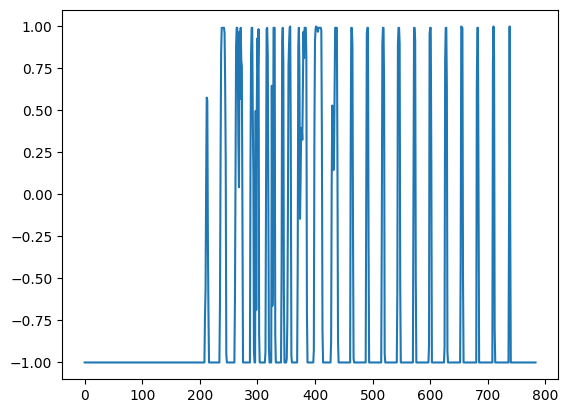

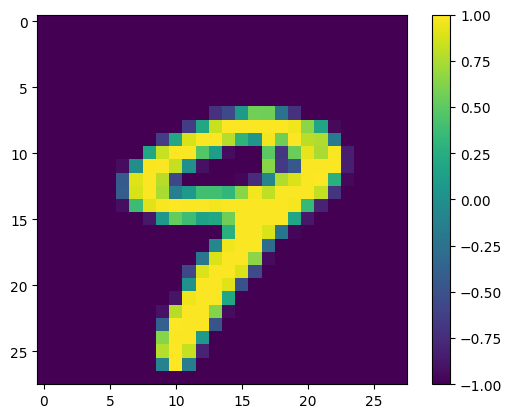

In [18]:

file_out = open('test_img_v02.sv', mode='w')

for i in range(9):
    img,label = valset[i]
    img_line = np.int32(np.array(img.reshape(-1))*128)<<4
    file_out.write(f"logic [BITS - 1 : 0] arr_{i}_digit_{label} [0 : WIDTH-1]= '{{")
    for i in range(len(img_line)):
        file_out.write(f"{img_line[i]},")  
    file_out.write(f"}}; \n")

file_out.close()
    
img_line = img.reshape(-1)    
plt.plot(img_line.numpy())

fig,ax = plt.subplots()
plt.imshow(img.reshape(28,-1).numpy())
plt.colorbar()

Predicted Digit = 6
True Digit = 5


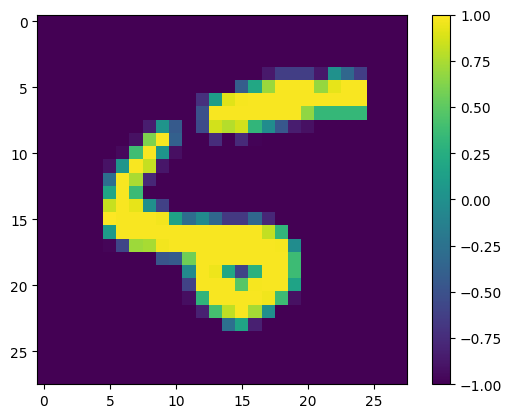

In [25]:
img,label = valset[8]

input_size = 784
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, output_size),
    nn.Softmax(dim=1)
)
model.load_state_dict(torch.load('epoh_10000_data_10000.pth'))
model.eval()

img = img.view(1, -1)

with torch.no_grad():
    logps = model(img)

ps = logps
probab = list(ps.numpy()[0])
print(f"Predicted Digit = {probab.index(max(probab))}")
print(f"True Digit = {label}")

fig,ax = plt.subplots()
plt.imshow(img.reshape(28,-1).numpy())
plt.colorbar()


## Testbench images for version 03

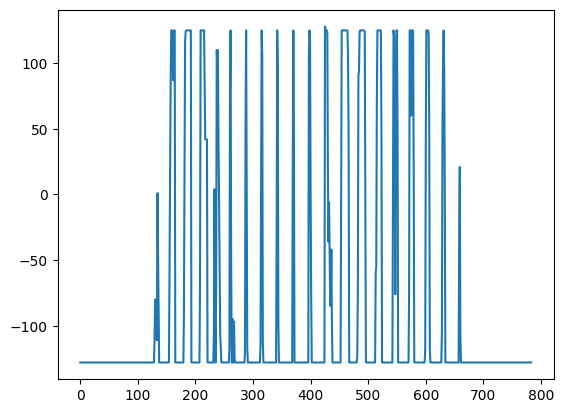

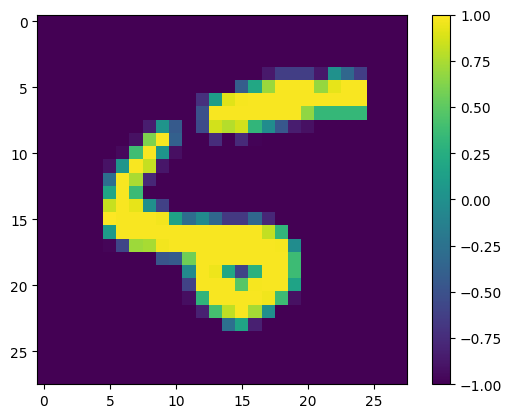

In [4]:
file_out = open('test_img_v03.sv', mode='w')

for i in range(9):
    img,label = valset[i]
    img_line = np.int32(np.array(img.reshape(-1))*128)
    file_out.write(f"logic [WGHT_INT + WGHT_FRC - 1 : 0] arr_{i}_digit_{label} [0 : WIDTH-1]= '{{")
    for i in range(len(img_line)):
        file_out.write(f"{img_line[i]},")  
    file_out.write(f"}}; \n")

file_out.close()
    
plt.plot(img_line)

fig,ax = plt.subplots()
plt.imshow(img.reshape(28,-1).numpy())
plt.colorbar()

/var/folders/5b/nld3r4fx24sd8nn5x3czjhvh0000gn/T/ipykernel_34885/3920246098.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('epoh_10000

Predicted Digit = 6
True Digit = 5


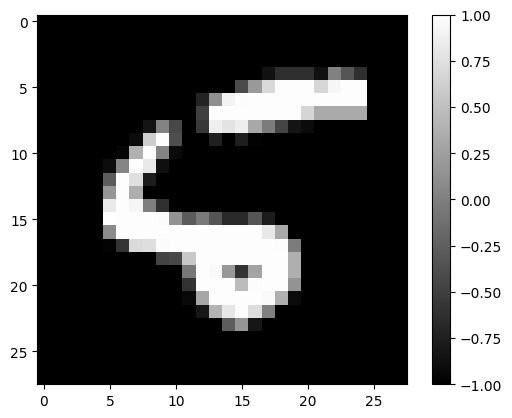

In [2]:
import torch
import numpy as np
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) 
])

valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=10000, shuffle=True)

input_size = 784
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, output_size),
    nn.Softmax(dim=1)
)

model.load_state_dict(torch.load('epoh_10000_data_10000.pth'))
model.eval()

with torch.no_grad():
    for images, labels in valloader:
        images = images.view(images.size(0), -1)
        
        normalized_images = images.numpy()

np.save("normalized_images.npy", normalized_images)
np.save("MNIST_test_labels.npy", labels)

img, label = valset[8] 

img = img.view(1, -1)

with torch.no_grad():
    logps = model(img)

probab = list(logps.numpy()[0])
predicted_digit = probab.index(max(probab))

print(f"Predicted Digit = {predicted_digit}")
print(f"True Digit = {label}")

fig, ax = plt.subplots()
plt.imshow(img.view(28, 28).numpy(), cmap="gray")
plt.colorbar()
plt.show()
